In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px

# 2018 Fuel Consumption Ratings

## Curation

In [74]:
fuel_ratings_2018 = pd.read_csv('MY2018 Fuel Consumption Ratings.csv', 
                                encoding='cp863', engine='python', usecols=[1,2,3,4,5,7,8,9,10,12], skiprows=[1], nrows=1083)
fuel_ratings_2018.shape

(1083, 10)

In [75]:
fuel_ratings_2018.columns

Index(['Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders', 'Fuel',
       'Fuel Consumption', 'Unnamed: 9', 'Unnamed: 10', 'CO2 Emissions'],
      dtype='object')

In [76]:
fuel_ratings_2018.columns = ['Make', 'Model', 'Vehicle Class', 'Engine Size (L)', 'Cylinders', 'Fuel Type', 
                             'City Fuel Economy (L/100km)', 'Hwy Fuel Economy (L/100km)', 'Comb Fuel Economy (L/100km)', 'CO2 Emissions (g/km)']

In [77]:
fuel_ratings_2018.replace(['X', 'Z', 'D', 'E', 'N'], ['Gasoline', 'Gasoline', 'Diesel', 'E85', 'Natural gas'], inplace=True)

In [78]:
hybrid_mask = fuel_ratings_2018['Model'].str.contains('Hybrid', case=False)

In [79]:
fuel_ratings_2018.loc[hybrid_mask, 'Fuel Type'] = fuel_ratings_2018.loc[hybrid_mask, 'Fuel Type'] + ' Hybrid'

In [80]:
# From the 2023 Fuel Consumption Guide
classes = ['Two-seater',
            'Minicompact',
            'Subcompact',
            'Compact',
            'Mid-size',
            'Full-size',
            'Station wagon: Small',
            'Station wagon: Mid-size',
            'Pickup truck: Small',
            'Pickup truck: Standard',
            'SUV: Small',
            'SUV: Standard',
            'Minivan',
            'Van: Cargo',
            'Van: Passenger',
            'Special purpose vehicle',
            ]

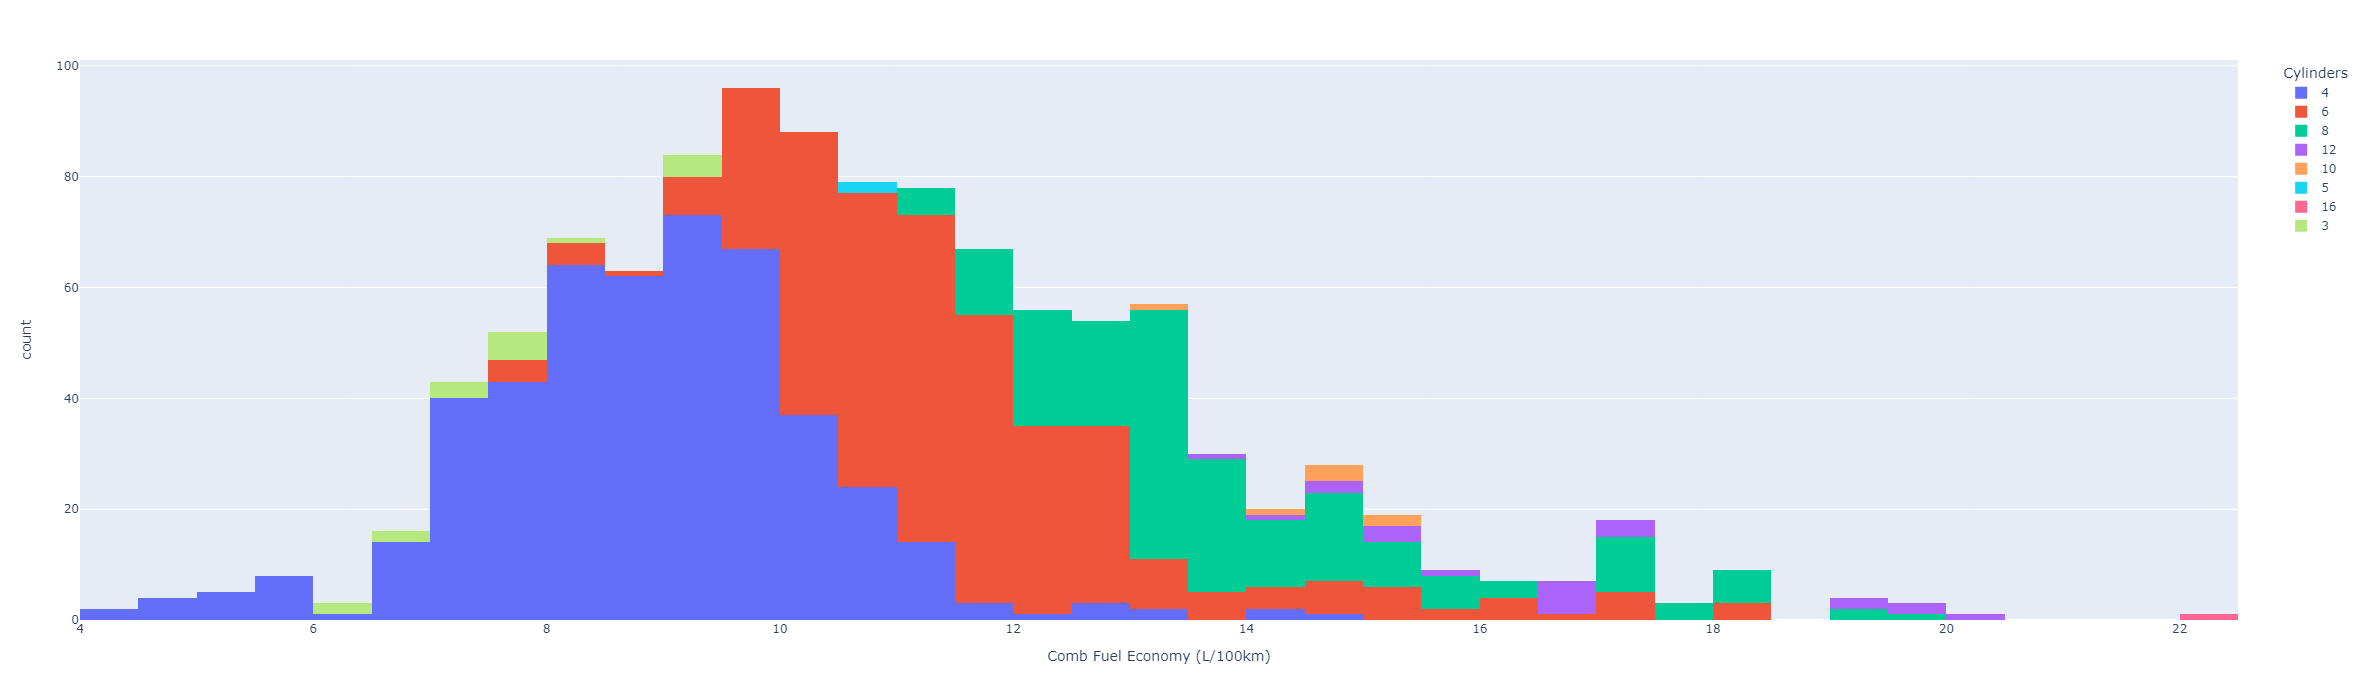

In [81]:
fig = px.histogram(fuel_ratings_2018, x='Comb Fuel Economy (L/100km)', color='Cylinders')
fig.update_layout(height=700)

fig.show()

In [10]:
fig = px.box(fuel_ratings_2018, y='Engine Size (L)', x='Vehicle Class')
fig.update_layout(height=700)

fig.show()

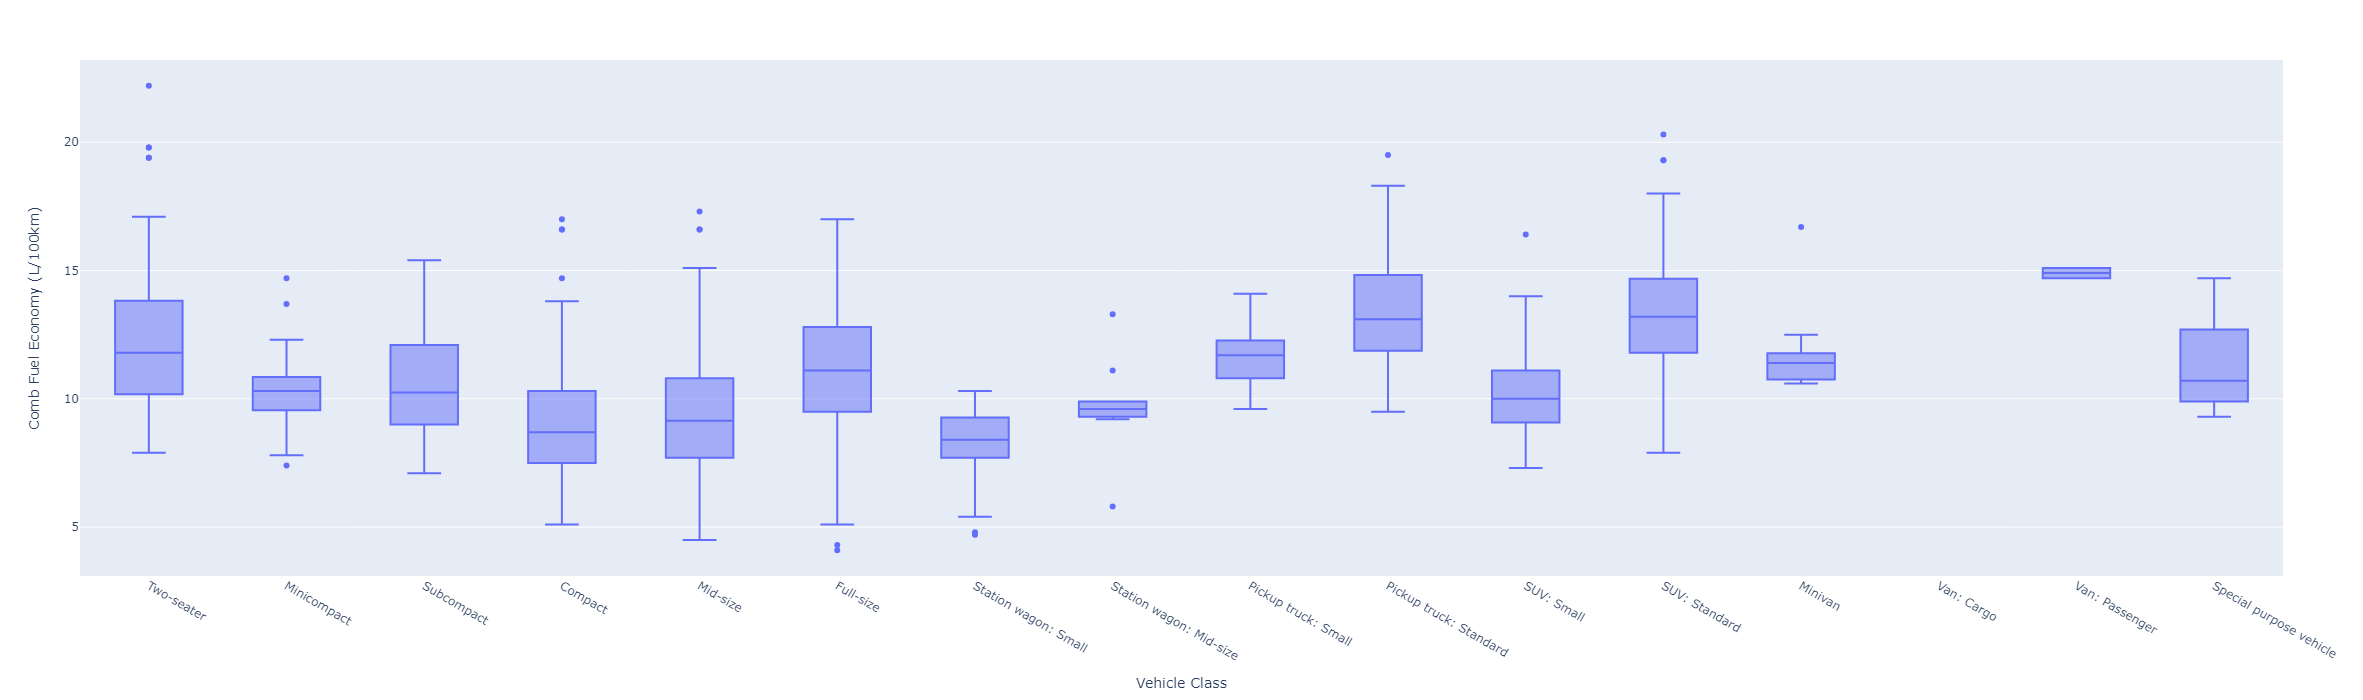

In [87]:
fig = px.box(fuel_ratings_2018, y='Comb Fuel Economy (L/100km)', x='Vehicle Class',
            category_orders={"Vehicle Class": ['Two-seater',
            'Minicompact',
            'Subcompact',
            'Compact',
            'Mid-size',
            'Full-size',
            'Station wagon: Small',
            'Station wagon: Mid-size',
            'Pickup truck: Small',
            'Pickup truck: Standard',
            'SUV: Small',
            'SUV: Standard',
            'Minivan',
            'Van: Cargo',
            'Van: Passenger',
            'Special purpose vehicle',
            ]})
fig.update_layout(height=700)

fig.show()

In [11]:
fuel_ratings_2018[fuel_ratings_2018['Engine Size (L)']>=6.0]

,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Fuel Type,City Fuel Economy (L/100km),Hwy Fuel Economy (L/100km),Comb Fuel Economy (L/100km),CO2 Emissions (g/km)
20,Aston Martin,Rapide S,Subcompact,6.0,12,Gasoline,16.7,10.9,14.1,332
21,Aston Martin,Vanquish,Minicompact,6.0,12,Gasoline,17.5,11.4,14.7,346
63,Bentley,Bentayga,SUV: Standard,6.0,12,Gasoline,18.8,12.2,15.9,370
64,Bentley,Continental GT Convertible,Compact,6.0,12,Gasoline,20.4,12.0,16.6,389
65,Bentley,Continental Supersports,Compact,6.0,12,Gasoline,20.4,12.0,16.6,389
67,Bentley,Flying Spur,Mid-size,6.0,12,Gasoline,20.4,12.0,16.6,389
68,Bentley,Mulsanne,Mid-size,6.8,8,Gasoline,20.9,13.0,17.3,405
124,BMW,M760i xDrive,Full-size,6.6,12,Gasoline,17.7,11.9,15.1,355
138,Bugatti,Chiron,Two-seater,8.0,16,Gasoline,26.8,16.6,22.2,522
168,Cadillac,CTS-V,Mid-size,6.2,8,Gasoline,16.5,11.1,14.0,329


In [12]:
fuel_ratings_2018[fuel_ratings_2018['Cylinders']>8]

,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Fuel Type,City Fuel Economy (L/100km),Hwy Fuel Economy (L/100km),Comb Fuel Economy (L/100km),CO2 Emissions (g/km)
19,Aston Martin,DB11 V12,Minicompact,5.2,12,Gasoline,15.5,11.4,13.7,322
20,Aston Martin,Rapide S,Subcompact,6.0,12,Gasoline,16.7,10.9,14.1,332
21,Aston Martin,Vanquish,Minicompact,6.0,12,Gasoline,17.5,11.4,14.7,346
44,Audi,R8,Two-seater,5.2,10,Gasoline,16.0,9.5,13.1,304
45,Audi,R8 quattro,Two-seater,5.2,10,Gasoline,17.1,11.3,14.5,338
46,Audi,R8 Spyder,Two-seater,5.2,10,Gasoline,17.1,11.3,14.5,338
63,Bentley,Bentayga,SUV: Standard,6.0,12,Gasoline,18.8,12.2,15.9,370
64,Bentley,Continental GT Convertible,Compact,6.0,12,Gasoline,20.4,12.0,16.6,389
65,Bentley,Continental Supersports,Compact,6.0,12,Gasoline,20.4,12.0,16.6,389
67,Bentley,Flying Spur,Mid-size,6.0,12,Gasoline,20.4,12.0,16.6,389


In [13]:
fuel_ratings_2018 = fuel_ratings_2018[fuel_ratings_2018['Engine Size (L)'] <= 6.0].reset_index(drop=True)
fuel_ratings_2018 = fuel_ratings_2018[fuel_ratings_2018['Cylinders'] <= 8].reset_index(drop=True)

In [14]:
fuel_ratings_2018.shape

(1022, 10)

In [73]:
fuel_ratings_2018.describe()

,Engine Size (L),Cylinders,City Fuel Economy (L/100km),Hwy Fuel Economy (L/100km),Comb Fuel Economy (L/100km),CO2 Emissions (g/km)
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,3.112188,5.596491,12.361865,8.991782,10.845983,250.037858
std,1.328216,1.832815,3.264331,2.053971,2.685583,56.065082
min,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.100000,7.600000,9.000000,210.000000
50%,3.000000,6.000000,12.000000,8.700000,10.500000,246.000000
75%,3.600000,6.000000,14.300000,10.200000,12.400000,287.500000
max,8.000000,16.000000,26.800000,18.000000,22.200000,522.000000


In [15]:
fuel_ratings_2018['Vehicle Class'] = pd.Categorical(fuel_ratings_2018['Vehicle Class'], categories=classes, ordered=True)

## Results

In [16]:
fuel_ratings_2018_grouped = fuel_ratings_2018.groupby(['Vehicle Class', 'Fuel Type']).mean(numeric_only=True)[['Comb Fuel Economy (L/100km)', 'CO2 Emissions (g/km)']].dropna()
fuel_ratings_2018_grouped

Comb Fuel Economy (L/100km)  \
Vehicle Class           Fuel Type                                      
Two-seater              Gasoline                           11.113462   
Minicompact             Gasoline                           10.009804   
Subcompact              Gasoline                           10.361538   
Compact                 Diesel                              6.675000   
                        Gasoline                            9.079825   
                        Gasoline Hybrid                     8.500000   
Mid-size                Diesel                              6.733333   
                        E85                                15.000000   
                        Gasoline                            9.353731   
                        Gasoline Hybrid                     5.766667   
Full-size               E85                                15.050000   
                        Gasoline                           10.446067   
                        Gasoline Hybrid                     5.500000   
Station wagon: Small    Diesel                              7.000000   
                        Gasoline                            8.289474   
Station wagon: Mid-size Gasoline                            9.710000   
Pickup truck: Small     Diesel                             10.340000   
                        Gasoline                           11.972727   
Pickup truck: Standard  Diesel                             10.242857   
                        E85                                17.250000   
                        Gasoline                           12.846970   
SUV: Small              Diesel                              7.700000   
                        E85                                13.900000   
                        Gasoline                           10.154878   
                        Gasoline Hybrid                     8.150000   
SUV: Standard           Diesel                              9.650000   
                        E85                                17.690000   
                        Gasoline                           12.870370   
                        Gasoline Hybrid                     8.300000   
Minivan                 E85                                16.700000   
                        Gasoline                           11.270000   
Van: Passenger          Gasoline                           14.900000   
Special purpose vehicle E85                                14.500000   
                        Gasoline                           10.550000   

                                         CO2 Emissions (g/km)  
Vehicle Class           Fuel Type                              
Two-seater              Gasoline                   260.038462  
Minicompact             Gasoline                   234.019608  
Subcompact              Gasoline                   242.450549  
Compact                 Diesel                     178.750000  
                        Gasoline                   212.684211  
                        Gasoline Hybrid            200.000000  
Mid-size                Diesel                     181.333333  
                        E85                        248.000000  
                        Gasoline                   219.320896  
                        Gasoline Hybrid            135.555556  
Full-size               E85                        249.625000  
                        Gasoline                   245.112360  
                        Gasoline Hybrid            128.000000  
Station wagon: Small    Diesel                     184.000000  
                        Gasoline                   194.447368  
Station wagon: Mid-size Gasoline                   227.100000  
Pickup truck: Small     Diesel                     277.400000  
                        Gasoline                   281.045455  
Pickup truck: Standard  Diesel                     275.000000  
                        E85                        286.850000  
                        Gasoline        

# 2023 Fuel Consumption Ratings

In [17]:
def group_fuel_classes(df, classes):
    df.columns = ['Make', 'Model', 'Vehicle Class', 'Engine Size (L)', 'Cylinders', 'Fuel Type', 
                             'City Fuel Economy (L/100km)', 'Hwy Fuel Economy (L/100km)', 'Comb Fuel Economy (L/100km)', 'CO2 Emissions (g/km)']
    df.replace(['X', 'Z', 'D', 'E', 'N'], ['Gasoline', 'Gasoline', 'Diesel', 'E85', 'Natural gas'], inplace=True)
    hybrid_mask = df['Model'].str.contains('Hybrid', case=False)
    df.loc[hybrid_mask, 'Fuel Type'] = df.loc[hybrid_mask, 'Fuel Type'] + ' Hybrid'
    df2 = df[df['Engine Size (L)'] <= 6.0].reset_index(drop=True)
    df2 = df2[df2['Cylinders'] <= 8].reset_index(drop=True)
    
    df2['Vehicle Class'] = pd.Categorical(df2['Vehicle Class'], categories=classes, ordered=True)
    result = df2.groupby(['Vehicle Class', 'Fuel Type']).mean(numeric_only=True)[['Comb Fuel Economy (L/100km)', 'CO2 Emissions (g/km)']].dropna()
    
    return df, result

fuel_ratings_2023 = pd.read_csv('MY2023 Fuel Consumption Ratings.csv', 
                                encoding='cp863', engine='python', usecols=[1,2,3,4,5,7,8,9,10,12], skiprows=[1], nrows=833)

In [18]:
fuel_ratings_2023, fuel_ratings_2023_grouped = group_fuel_classes(fuel_ratings_2023, classes)

In [19]:
fuel_ratings_2023_grouped

Comb Fuel Economy (L/100km)  \
Vehicle Class           Fuel Type                                      
Two-seater              Gasoline                           11.361905   
Minicompact             Gasoline                           10.689474   
Subcompact              Gasoline                           10.420000   
Compact                 Gasoline                            9.213559   
                        Gasoline Hybrid                     4.966667   
Mid-size                Gasoline                            9.476289   
                        Gasoline Hybrid                     5.000000   
Full-size               Gasoline                            9.897297   
                        Gasoline Hybrid                     5.000000   
Station wagon: Small    Gasoline                            8.185714   
Station wagon: Mid-size Gasoline                           10.900000   
Pickup truck: Small     Gasoline                           12.131250   
                        Gasoline Hybrid                     6.400000   
Pickup truck: Standard  Diesel                              9.877778   
                        E85                                17.486667   
                        Gasoline                           12.829032   
                        Gasoline Hybrid                    11.125000   
SUV: Small              Diesel                              9.850000   
                        Gasoline                            9.899454   
                        Gasoline Hybrid                     6.288889   
SUV: Standard           Diesel                             10.300000   
                        Gasoline                           12.999115   
                        Gasoline Hybrid                     7.666667   
Minivan                 Gasoline                            9.671429   
Special purpose vehicle Gasoline                           10.820000   

                                         CO2 Emissions (g/km)  
Vehicle Class           Fuel Type                              
Two-seater              Gasoline                   266.238095  
Minicompact             Gasoline                   250.684211  
Subcompact              Gasoline                   243.585714  
Compact                 Gasoline                   215.796610  
                        Gasoline Hybrid            116.333333  
Mid-size                Gasoline                   222.020619  
                        Gasoline Hybrid            117.000000  
Full-size               Gasoline                   231.729730  
                        Gasoline Hybrid            117.000000  
Station wagon: Small    Gasoline                   192.000000  
Station wagon: Mid-size Gasoline                   258.142857  
Pickup truck: Small     Gasoline                   284.375000  
                        Gasoline Hybrid            149.000000  
Pickup truck: Standard  Diesel                     265.777778  
                        E85                        287.200000  
                        Gasoline                   301.403226  
                        Gasoline Hybrid            260.500000  
SUV: Small              Diesel                     265.000000  
                        Gasoline                   232.032787  
                        Gasoline Hybrid            148.000000  
SUV: Standard           Diesel                     276.222222  
                        Gasoline                   304.362832  
                        Gasoline Hybrid            179.666667  
Minivan                 Gasoline                   227.000000  
Special purpose vehicle Gasoline                   252.800000

# 2020 Fuel Consumption Ratings

In [20]:
fuel_ratings_2020 = pd.read_csv('MY2020 Fuel Consumption Ratings.csv', 
                                encoding='cp863', engine='python', usecols=[1,2,3,4,5,7,8,9,10,12], skiprows=[1], nrows=975)

In [21]:
fuel_ratings_2020.columns

Index(['Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders', 'Fuel',
       'Fuel Consumption', 'Unnamed: 9', 'Unnamed: 10', 'CO2 Emissions'],
      dtype='object')

In [22]:
fuel_ratings_2020['Vehicle Class'].unique().size

15

In [23]:
fuel_ratings_2020, fuel_ratings_2020_grouped = group_fuel_classes(fuel_ratings_2020, classes)

In [24]:
fuel_ratings_2020_grouped

Comb Fuel Economy (L/100km)  \
Vehicle Class           Fuel Type                                      
Two-seater              Gasoline                           10.931373   
Minicompact             Gasoline                           10.657143   
Subcompact              Gasoline                           10.682222   
Compact                 Gasoline                            9.070476   
                        Gasoline Hybrid                     4.500000   
Mid-size                Gasoline                            9.294545   
                        Gasoline Hybrid                     5.866667   
Full-size               E85                                14.700000   
                        Gasoline                           10.453846   
                        Gasoline Hybrid                     5.000000   
Station wagon: Small    Gasoline                            8.120000   
Station wagon: Mid-size Gasoline                           10.800000   
Pickup truck: Small     Diesel                             10.700000   
                        Gasoline                           11.892857   
Pickup truck: Standard  Diesel                              9.663636   
                        E85                                18.080000   
                        Gasoline                           12.923077   
SUV: Small              Diesel                              9.500000   
                        Gasoline                           10.078689   
                        Gasoline Hybrid                     6.675000   
SUV: Standard           Diesel                              9.866667   
                        E85                                18.325000   
                        Gasoline                           12.936364   
                        Gasoline Hybrid                     7.666667   
Minivan                 Gasoline                           11.200000   
Van: Passenger          E85                                19.450000   
                        Gasoline                           14.750000   
Special purpose vehicle E85                                12.550000   
                        Gasoline                            9.954545   

                                         CO2 Emissions (g/km)  
Vehicle Class           Fuel Type                              
Two-seater              Gasoline                   256.019608  
Minicompact             Gasoline                   250.095238  
Subcompact              Gasoline                   250.033333  
Compact                 Gasoline                   212.114286  
                        Gasoline Hybrid            106.000000  
Mid-size                Gasoline                   217.790909  
                        Gasoline Hybrid            137.333333  
Full-size               E85                        246.000000  
                        Gasoline                   245.184615  
                        Gasoline Hybrid            117.000000  
Station wagon: Small    Gasoline                   190.720000  
Station wagon: Mid-size Gasoline                   253.500000  
Pickup truck: Small     Diesel                     286.800000  
                        Gasoline                   278.357143  
Pickup truck: Standard  Diesel                     259.636364  
                        E85                        301.200000  
                        Gasoline                   303.353846  
SUV: Small              Diesel                     255.000000  
                        Gasoline                   236.076503  
                        Gasoline Hybrid            156.000000  
SUV: Standard           Diesel                     263.666667  
                        E85                        305.000000  
                        Gasoline                   302.878788  
                        Gasoline Hybrid            179.666667  
Minivan                 Gasoline                   262.750000  
Van: Passenger          E85                        322.000000  
                

In [25]:
fuel_ratings_2020_grouped.to_clipboard()

# 2010-2014 Fuel Consumption Ratings

In [26]:
fuel_ratings_2014 = pd.read_csv('MY2010-2014 Fuel Consumption Ratings 5-cycle.csv', 
                                encoding='cp863', engine='python', usecols=[1,2,3,4,5,7,8,9,10,12], skiprows=[1], nrows=5359)

In [27]:
fuel_ratings_2014

,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,CO2 EMISSIONS
0,ACURA,CSX,COMPACT,2.0,4,X,10.9,7.8,9.5,219
1,ACURA,CSX,COMPACT,2.0,4,X,10.0,7.6,8.9,205
2,ACURA,CSX,COMPACT,2.0,4,Z,11.6,8.1,10.0,230
3,ACURA,MDX AWD,SUV,3.7,6,Z,14.8,11.3,13.2,304
4,ACURA,RDX AWD TURBO,SUV,2.3,4,Z,13.2,10.3,11.9,274
...,...,...,...,...,...,...,...,...,...,...
5354,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,X,13.4,9.8,11.8,271
5355,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,X,13.2,9.5,11.5,264
5356,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,X,13.4,9.8,11.8,271
5357,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,X,12.9,9.3,11.3,260


In [28]:
fuel_ratings_2014['VEHICLE CLASS'].unique()

array(['COMPACT', 'SUV', 'MID-SIZE', 'MINICOMPACT', 'TWO-SEATER',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'FULL-SIZE', 'PICKUP TRUCK - STANDARD', 'PICKUP TRUCK - SMALL',
       'VAN - CARGO', 'VAN - PASSENGER', 'MINIVAN',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV - STANDARD'],
      dtype=object)

In [29]:
# From the older Fuel Consumption Guides
classes_old = ['TWO-SEATER',
            'MINICOMPACT',
            'SUBCOMPACT',
            'COMPACT',
            'MID-SIZE',
            'FULL-SIZE',
            'STATION WAGON - SMALL',
            'STATION WAGON - MID-SIZE',
            'PICKUP TRUCK - SMALL',
            'PICKUP TRUCK - STANDARD',
            'SUV',
            'SUV - SMALL',
            'SUV - STANDARD',
            'MINIVAN',
            'VAN - CARGO',
            'VAN - PASSENGER',
            'SPECIAL PURPOSE VEHICLE'
            ]

In [30]:
fuel_ratings_2014, fuel_ratings_2014_grouped = group_fuel_classes(fuel_ratings_2014, classes_old)

In [31]:
fuel_ratings_2014_grouped

Comb Fuel Economy (L/100km)  \
Vehicle Class            Fuel Type                                      
TWO-SEATER               Gasoline                           10.717373   
MINICOMPACT              Gasoline                           10.438583   
SUBCOMPACT               E85                                14.433333   
                         Gasoline                           10.761036   
COMPACT                  Diesel                              7.456000   
                         E85                                12.566667   
                         Gasoline                            9.619106   
                         Gasoline Hybrid                     6.383333   
MID-SIZE                 Diesel                              7.925000   
                         E85                                14.502632   
                         Gasoline                           10.109683   
                         Gasoline Hybrid                     6.505405   
FULL-SIZE                Diesel                              9.333333   
                         E85                                15.263158   
                         Gasoline                           11.944128   
                         Gasoline Hybrid                     9.758333   
STATION WAGON - SMALL    Diesel                              7.320000   
                         Gasoline                            9.636207   
STATION WAGON - MID-SIZE Gasoline                           10.781481   
PICKUP TRUCK - SMALL     Gasoline                           12.758140   
PICKUP TRUCK - STANDARD  Diesel                             10.400000   
                         E85                                19.051887   
                         Gasoline                           14.269608   
                         Gasoline Hybrid                    10.875000   
SUV                      Diesel                             11.377778   
                         E85                                16.576389   
                         Gasoline                           12.244228   
                         Gasoline Hybrid                    10.168966   
SUV - SMALL              Diesel                              8.750000   
                         E85                                16.540000   
                         Gasoline                           10.575000   
                         Gasoline Hybrid                     8.666667   
SUV - STANDARD           Diesel                             10.607692   
                         E85                                18.224324   
                         Gasoline                           14.043885   
                         Gasoline Hybrid                     9.953846   
MINIVAN                  E85                                16.553333   
                         Gasoline                           11.358621   
VAN - CARGO              E85                                21.810417   
                         Gasoline                           16.001724   
VAN - PASSENGER          E85                                23.754386   
                         Gasoline                           17.670492   
SPECIAL PURPOSE VEHICLE  Gasoline                           10.256250   

                                          CO2 Emissions (g/km)  
Vehicle Class            Fuel Type                              
TWO-SEATER               Gasoline                   246.580508  
MINICOMPACT              Gasoline                   240.173228  
SUBCOMPACT               E85                        231.000000  
                         Gasoline                   247.617117  
COMPACT                  Diesel                     200.280000  
                         E85                        201.055556  
                         Gasoline                   221.323575  
                         Gasoline Hybrid            146.916667  
MID-SIZE                 Diesel                     211.916667  
                         E85             

# 2005-2009 Fuel Consumption Ratings

In [32]:
fuel_ratings_2009 = pd.read_csv('MY2005-2009 Fuel Consumption Ratings 5-cycle.csv', 
                                encoding='cp863', engine='python', usecols=[1,2,3,4,5,7,8,9,10,12], skiprows=[1], nrows=5205)

In [33]:
fuel_ratings_2009, fuel_ratings_2009_grouped = group_fuel_classes(fuel_ratings_2009, classes_old)

In [34]:
fuel_ratings_2009_grouped

Comb Fuel Economy (L/100km)  \
Vehicle Class            Fuel Type                                      
TWO-SEATER               Diesel                              5.200000   
                         Gasoline                           12.814286   
MINICOMPACT              Gasoline                           11.710879   
SUBCOMPACT               Diesel                              6.850000   
                         Gasoline                           11.160890   
COMPACT                  Diesel                              7.254545   
                         E85                                15.066667   
                         Gasoline                           10.790476   
                         Gasoline Hybrid                     5.600000   
MID-SIZE                 Diesel                              8.850000   
                         E85                                14.590909   
                         Gasoline                           11.266790   
                         Gasoline Hybrid                     7.835714   
FULL-SIZE                E85                                16.100000   
                         Gasoline                           12.478899   
STATION WAGON - SMALL    Diesel                              7.250000   
                         Gasoline                           10.581967   
STATION WAGON - MID-SIZE Diesel                              8.600000   
                         E85                                16.200000   
                         Gasoline                           11.546457   
PICKUP TRUCK - SMALL     Gasoline                           13.040541   
PICKUP TRUCK - STANDARD  E85                                20.692063   
                         Gasoline                           14.741700   
                         Gasoline Hybrid                    13.462500   
SUV                      Diesel                             11.542857   
                         E85                                20.003175   
                         Gasoline                           13.471429   
                         Gasoline Hybrid                     9.473077   
MINIVAN                  E85                                17.368182   
                         Gasoline                           12.444915   
VAN - CARGO              E85                                21.633333   
                         Gasoline                           15.862195   
VAN - PASSENGER          E85                                22.366667   
                         Gasoline                           16.468182   

                                          CO2 Emissions (g/km)  
Vehicle Class            Fuel Type                              
TWO-SEATER               Diesel                     140.000000  
                         Gasoline                   294.798319  
MINICOMPACT              Gasoline                   269.393305  
SUBCOMPACT               Diesel                     184.750000  
                         Gasoline                   256.742389  
COMPACT                  Diesel                     195.545455  
                         E85                        241.000000  
                         Gasoline                   248.216590  
                         Gasoline Hybrid            129.000000  
MID-SIZE                 Diesel                     239.000000  
                         E85                        233.363636  
                         Gasoline                   259.166976  
                         Gasoline Hybrid            180.285714  
FULL-SIZE                E85                        257.733333  
                         Gasoline                   287.032110  
STATION WAGON - SMALL    Diesel                     195.333333  
                         Gasoline                   243.422131  
STATION WAGON - MID-SIZE Diesel                     232.000000  
                         E85                        259.000000  
                         Gasoline               

# All ICE Ratings

In [35]:
fuel_ratings_2018 = pd.read_csv('MY2018 Fuel Consumption Ratings.csv', 
                                encoding='cp863', engine='python', usecols=[1,2,3,4,5,7,8,9,10,12], skiprows=[1], nrows=1083)
fuel_ratings_2018.shape

(1083, 10)

In [36]:
fuel_ratings_2018, _ = group_fuel_classes(fuel_ratings_2018, classes)

In [37]:
fuel_ratings = pd.concat([fuel_ratings_2009, fuel_ratings_2014, fuel_ratings_2018, fuel_ratings_2023], axis=0)
fuel_ratings.shape

(12480, 10)

In [38]:
fuel_ratings['Engine Size'] = pd.cut(fuel_ratings['Engine Size (L)'], bins=list(range(10)), labels=["[{},{})".format(i, i + 1) for i in range(9)])

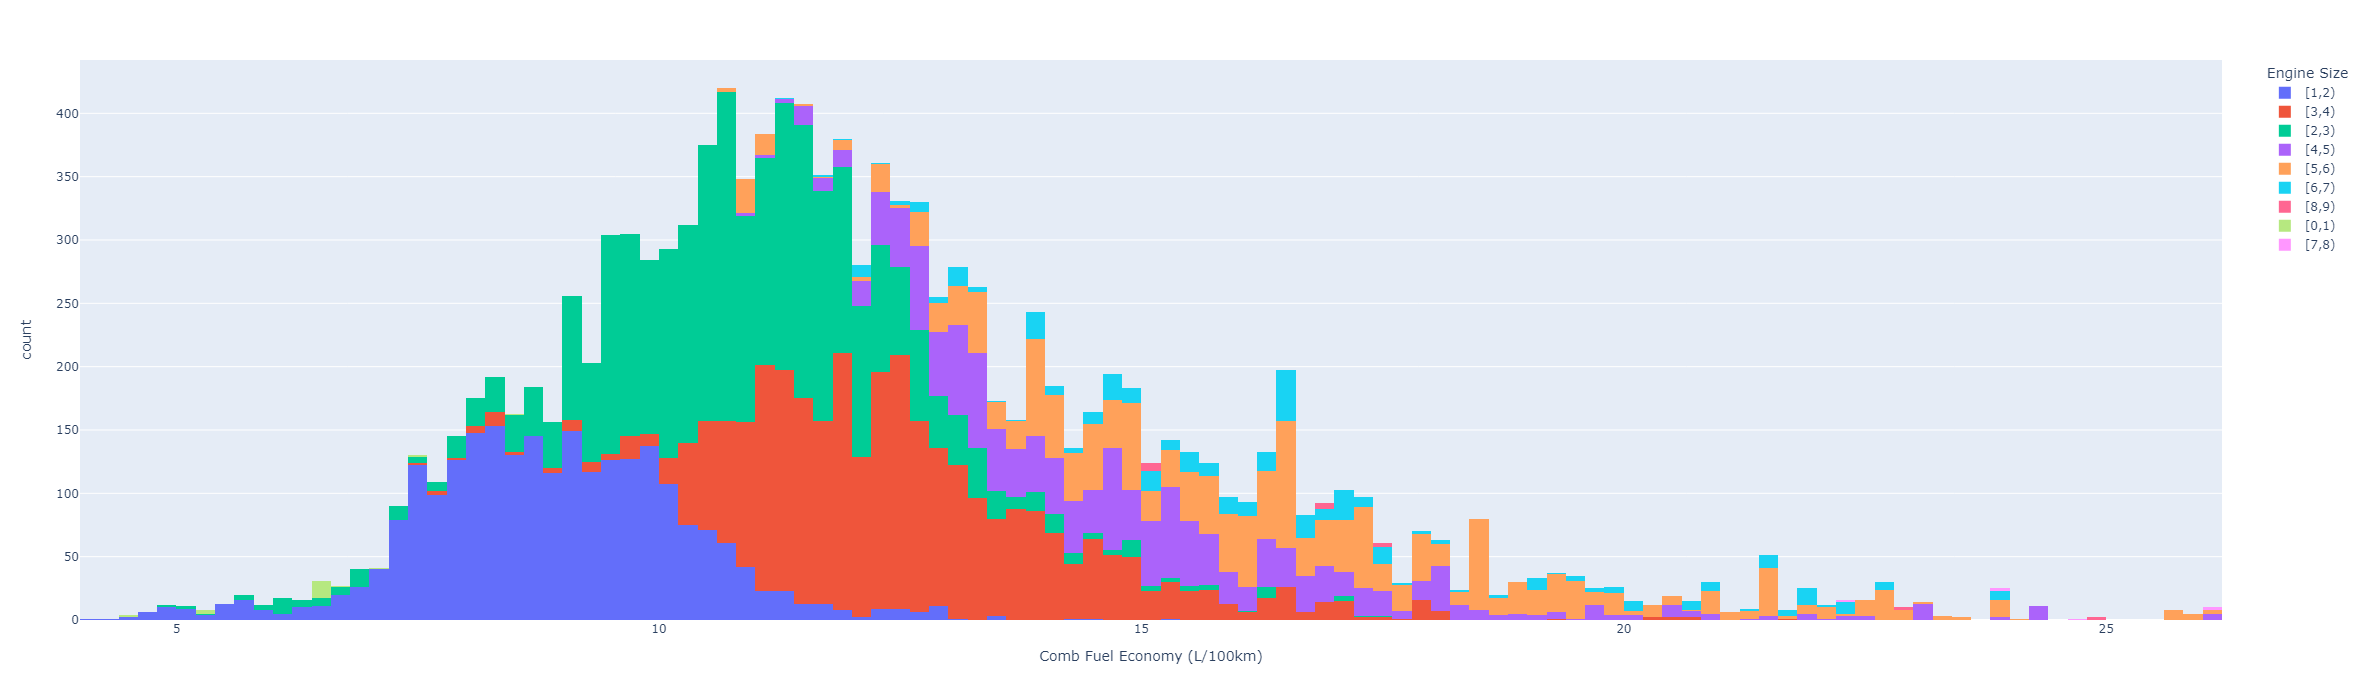

In [39]:
fig = px.histogram(fuel_ratings, x='Comb Fuel Economy (L/100km)', color='Engine Size')
fig.update_layout(height=700)

fig.show()

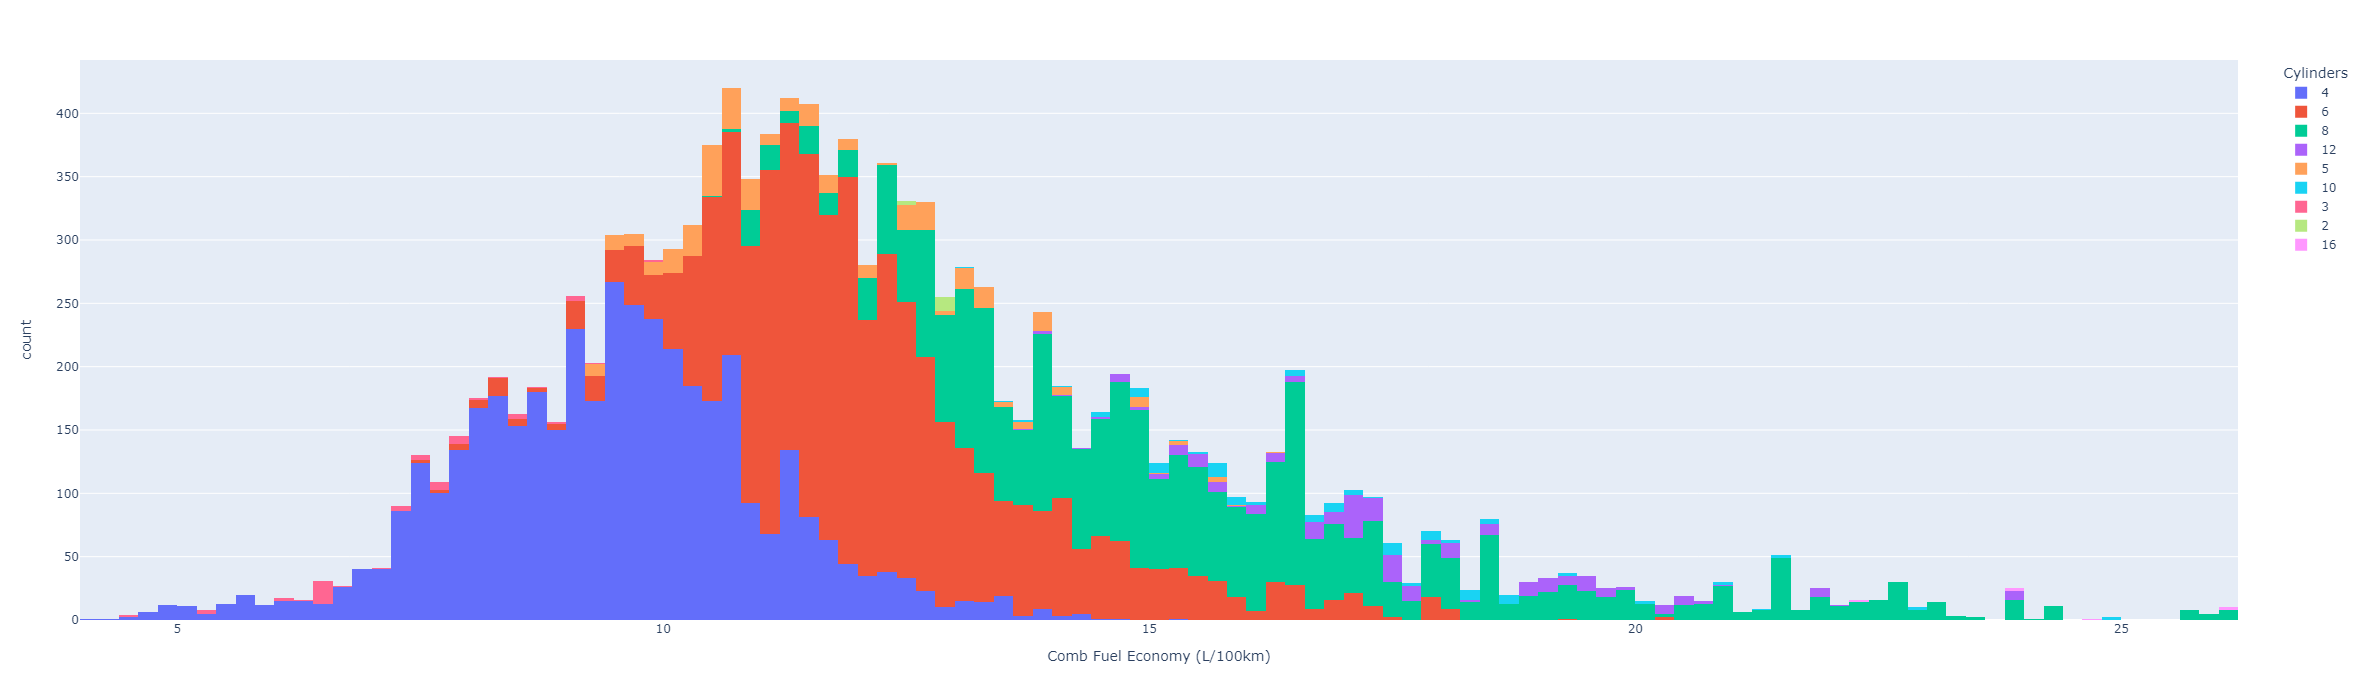

In [40]:
fig = px.histogram(fuel_ratings, x='Comb Fuel Economy (L/100km)', color='Cylinders')
fig.update_layout(height=700)

fig.show()

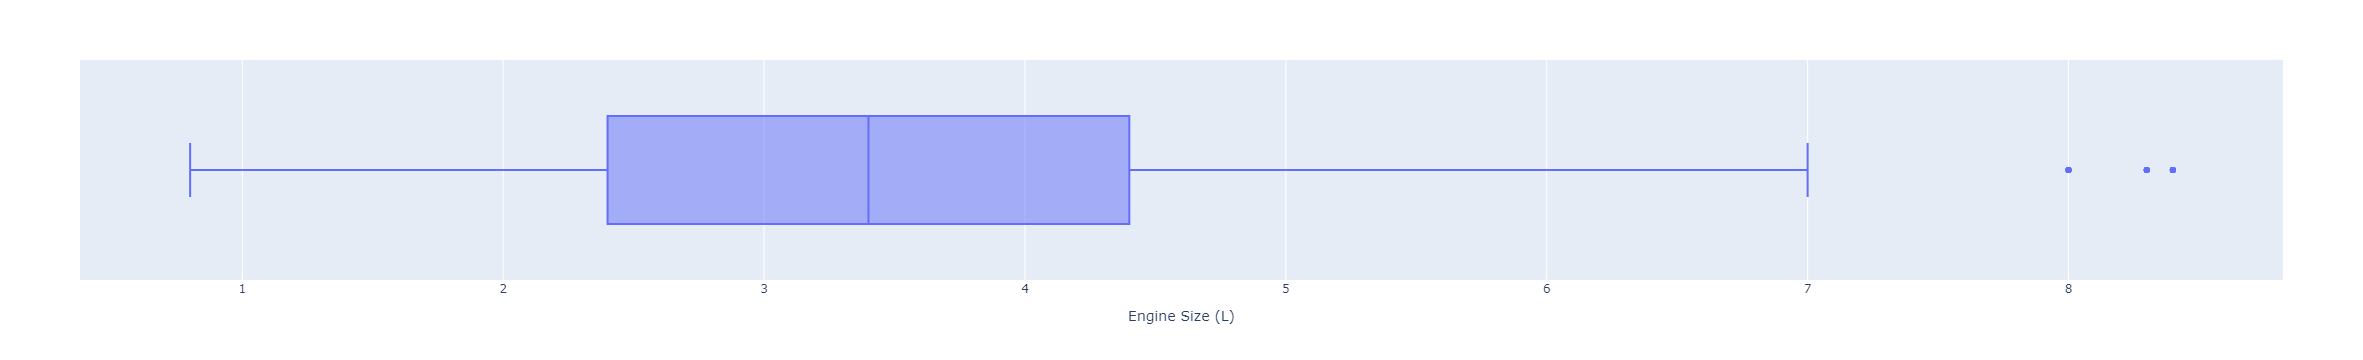

In [41]:
fig = px.box(fuel_ratings, x='Engine Size (L)')

fig.show()

# 2012-2023 BEV

In [42]:
BEV_2023 = pd.read_csv('MY2012-2023 Battery Electric Vehicles.csv', 
                       encoding='cp863', engine='python', usecols=[1,2,3,4,7,8,9,13,17], skiprows=[1], nrows=455)

In [43]:
BEV_2023

,Make,Model.1,Vehicle Class,Motor,Consumption,Unnamed: 8,Unnamed: 9,Range,Recharge
0,Mitsubishi,i-MiEV,Subcompact,49,16.9,21.4,18.7,100,7.0
1,Nissan,LEAF,Mid-size,80,19.3,23.0,21.1,117,7.0
2,Ford,Focus Electric,Compact,107,19.0,21.1,20.0,122,4.0
3,Mitsubishi,i-MiEV,Subcompact,49,16.9,21.4,18.7,100,7.0
4,Nissan,LEAF,Mid-size,80,19.3,23.0,21.1,117,7.0
...,...,...,...,...,...,...,...,...,...
450,Volkswagen,ID.4,SUV: Small,150,18.2,21.2,19.6,336,6.0
451,Volkswagen,ID.4 Pro,SUV: Small,150,18.2,21.3,19.6,443,7.5
452,Volkswagen,ID.4 AWD Pro,SUV: Small,220,20.1,22.6,21.2,410,7.5
453,Volvo,C40 Recharge Twin,SUV: Small,300,22.2,26.1,23.9,364,8.0


In [44]:
BEV_2023.columns

Index(['Make', 'Model.1', 'Vehicle Class', 'Motor', 'Consumption',
       'Unnamed: 8', 'Unnamed: 9', 'Range', 'Recharge'],
      dtype='object')

In [45]:
BEV_2023.columns = ['Make', 'Model', 'Vehicle Class', 'Motor (kW)', 'City Consumption (kWh/100km)', 'Hwy Consumption (kWh/100km)', 
                    'Combined Consumption (kWh/100km)', 'Range (km)', 'Recharge Time (h)']

In [46]:
BEV_2023_grouped = BEV_2023.groupby(['Vehicle Class']).mean(numeric_only=True)[['Combined Consumption (kWh/100km)', 'Range (km)']].dropna()

In [47]:
BEV_2023_grouped

,Combined Consumption (kWh/100km),Range (km)
Vehicle Class,,
Compact,24.644828,284.655172
Full-size,20.413830,512.723404
Mid-size,20.019767,361.139535
Pickup truck: Standard,29.952941,493.941176
SUV: Small,21.667647,418.588235
SUV: Standard,25.030137,453.726027
Station wagon: Small,19.300000,361.024390
Subcompact,19.257143,239.542857
Two-seater,19.733333,103.500000


In [48]:
fig = px.histogram(BEV_2023, x='Range (km)')

fig.show()

In [49]:
print(BEV_2023['Range (km)'].mean(), BEV_2023['Range (km)'].std())

399.8241758241758 141.0268660478626


In [50]:
BEV_2023[BEV_2023['Range (km)']>500]

,Make,Model,Vehicle Class,Motor (kW),City Consumption (kWh/100km),Hwy Consumption (kWh/100km),Combined Consumption (kWh/100km),Range (km),Recharge Time (h)
55,Tesla,Model S P100D,Full-size,568,22.6,20.0,21.5,507,12.0
74,Tesla,Model S 100D,Full-size,386,20.7,20.5,20.6,539,12.0
76,Tesla,Model S P100D,Full-size,568,22.6,20.0,21.5,507,12.0
99,Tesla,Model S 100D,Full-size,386,20.7,20.5,20.6,539,12.0
100,Tesla,Model S P100D,Full-size,568,22.6,20.0,21.5,507,12.0
...,...,...,...,...,...,...,...,...,...
434,Tesla,"Model S Plaid (19"" Wheels)",Full-size,750,17.6,18.7,18.1,637,15.0
435,Tesla,"Model S Plaid (21"" Wheels)",Full-size,750,20.4,21.2,20.8,560,15.0
436,Tesla,Model X,SUV: Standard,494,19.7,21.7,20.6,560,14.0
437,Tesla,"Model X Plaid (20"" Wheels)",SUV: Standard,750,20.4,22.5,21.4,536,14.0


In [51]:
fig = px.box(BEV_2023, x='Range (km)')
fig.show()

In [52]:
BEV_2023['Range Class'] = pd.cut(BEV_2023['Range (km)'], bins=[0, 250, 500, 900], labels=['<250', '<500', '<800'])

In [53]:
fig = px.histogram(BEV_2023, x='Combined Consumption (kWh/100km)', color='Range Class')
fig.update_layout(height=700)

fig.show()

In [54]:
BEV_2023['Vehicle Class'] = pd.Categorical(BEV_2023['Vehicle Class'], categories=classes, ordered=True)

In [55]:
BEV_2023_grouped = BEV_2023.groupby(['Vehicle Class', 'Range Class']).mean(numeric_only=True)[['Combined Consumption (kWh/100km)', 'Range (km)']].dropna()

In [56]:
BEV_2023_grouped

Combined Consumption (kWh/100km)  \
Vehicle Class          Range Class                                     
Two-seater             <250                                19.733333   
Subcompact             <250                                18.340000   
                       <500                                21.550000   
Compact                <250                                19.000000   
                       <500                                27.615789   
Mid-size               <250                                18.376190   
                       <500                                21.369811   
                       <800                                16.933333   
Full-size              <250                                22.200000   
                       <500                                21.651064   
                       <800                                19.110870   
Station wagon: Small   <250                                18.855556   
                       <500                                19.425000   
Pickup truck: Standard <500                                31.333333   
                       <800                                28.400000   
SUV: Small             <500                                22.047458   
                       <800                                19.177778   
SUV: Standard          <500                                25.546154   
                       <800                                23.752381   

                                    Range (km)  
Vehicle Class          Range Class              
Two-seater             <250         103.500000  
Subcompact             <250         164.680000  
                       <500         426.700000  
Compact                <250         165.900000  
                       <500         347.157895  
Mid-size               <250         176.619048  
                       <500         394.660377  
                       <800         536.000000  
Full-size              <250         224.000000  
                       <500         409.936170  
                       <800         624.021739  
Station wagon: Small   <250         199.777778  
                       <500         406.375000  
Pickup truck: Standard <500         456.000000  
                       <800         536.625000  
SUV: Small             <500         404.237288  
                       <800         512.666667  
SUV: Standard          <500         417.538462  
                       <800         543.333333

# 2012-2023 PHEV

In [57]:
PHEV_2023 = pd.read_csv('MY2012-2023 Plug-in Hybrid Electric Vehicles.csv', 
                       encoding='cp863', engine='python', usecols=[1,2,3,4,5,6,8,9,10,11,15,17], skiprows=[1], nrows=250)

In [58]:
PHEV_2023.columns

Index(['Make', 'Model.1', 'Vehicle Class', 'Motor', 'Engine Size', 'Cylinders',
       'Fuel', 'Consumption', 'Range 1', 'Recharge', 'Unnamed: 15',
       'CO2 Emissions'],
      dtype='object')

In [59]:
PHEV_2023.columns = ['Make', 'Model', 'Vehicle Class', 'Motor (kW)', 'Engine Size (L)', 'Cylinders', 'Fuel Type', 'Combined Consumption (Le/100km)', 
                     'Range (km)', 'Recharge Time (h)', 'Fuel-only Consumption (L/100km)', 'CO2 Emissions (g/km)']
PHEV_2023.replace(['B/X', 'B/Z', 'B/Z*', 'B/X*'], ['B/G', 'B/G', 'B/G*', 'B/G*'], inplace=True)

In [60]:
PHEV_2023['Consumption (Le/100km)'] = PHEV_2023['Combined Consumption (Le/100km)'].str.extract(r'(\d+\.\d+)').astype(float)

In [61]:
PHEV_2023.dtypes

Make                                object
Model                               object
Vehicle Class                       object
Motor (kW)                           int64
Engine Size (L)                    float64
Cylinders                            int64
Fuel Type                           object
Combined Consumption (Le/100km)     object
Range (km)                           int64
Recharge Time (h)                  float64
Fuel-only Consumption (L/100km)    float64
CO2 Emissions (g/km)                 int64
Consumption (Le/100km)             float64
dtype: object

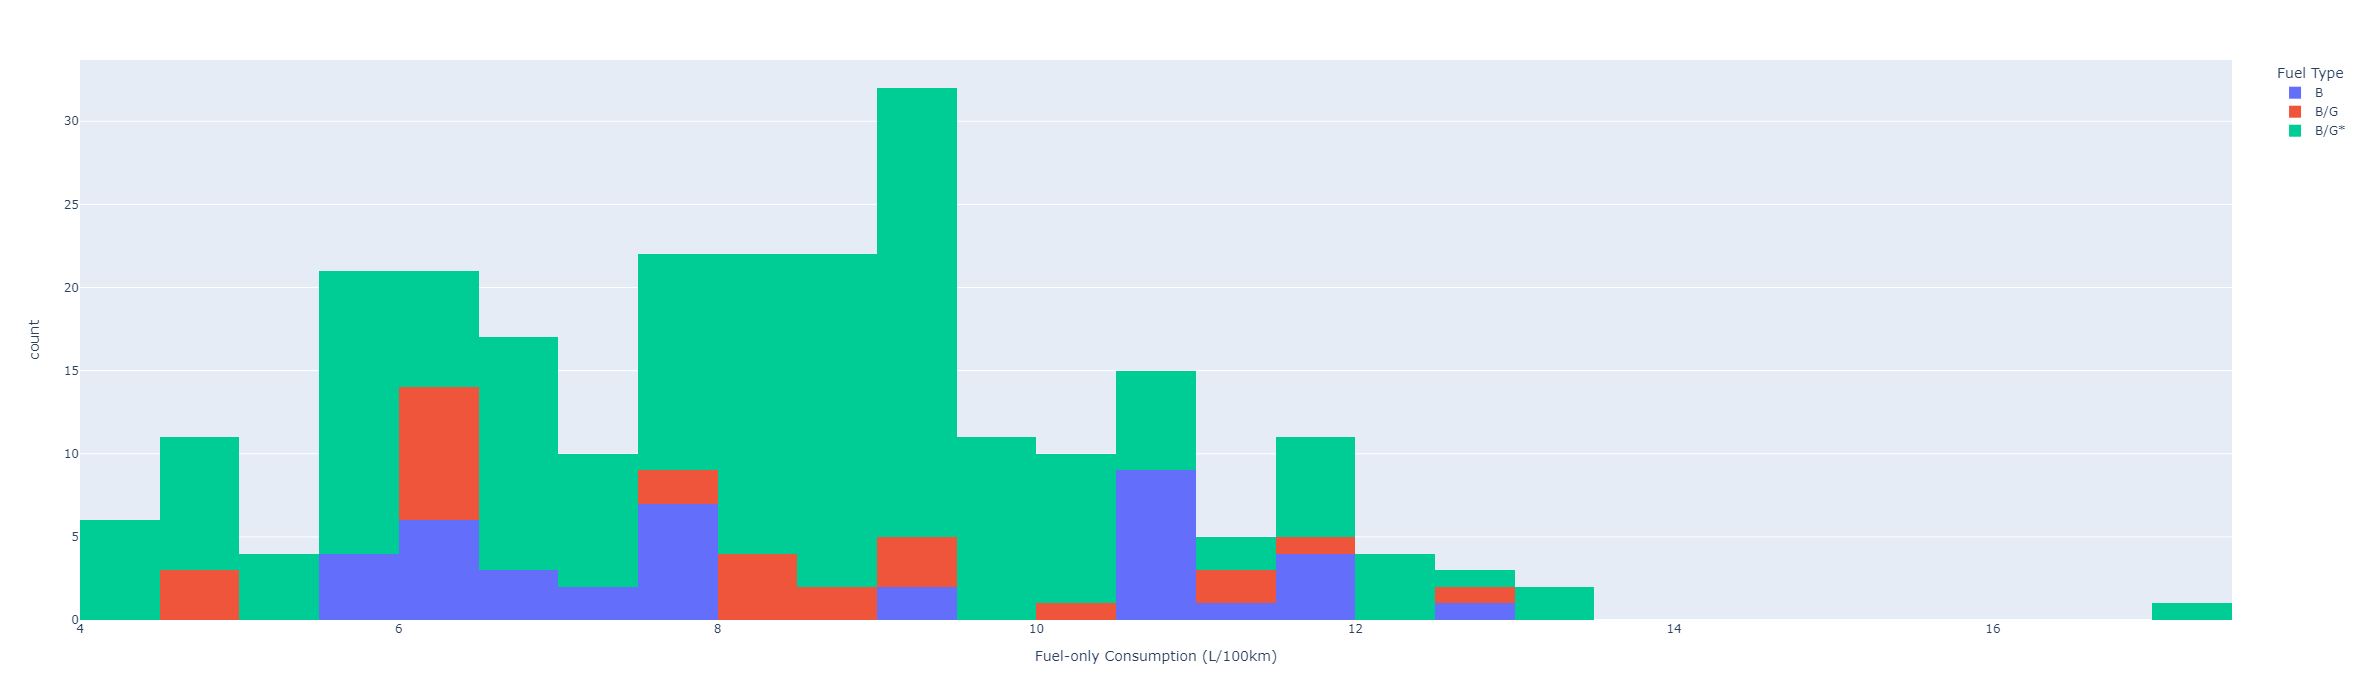

In [62]:
fig = px.histogram(PHEV_2023, x='Fuel-only Consumption (L/100km)', color='Fuel Type')
fig.update_layout(height=700)

fig.show()

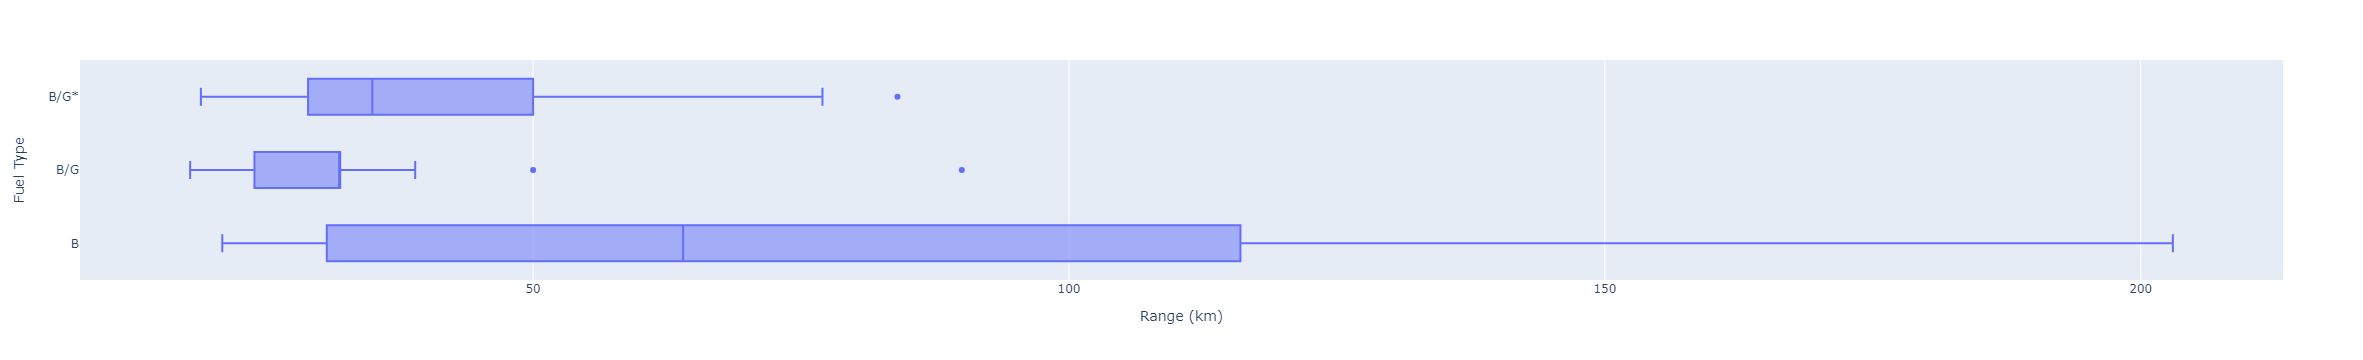

In [63]:
fig = px.box(PHEV_2023, x='Range (km)', y='Fuel Type')

fig.show()

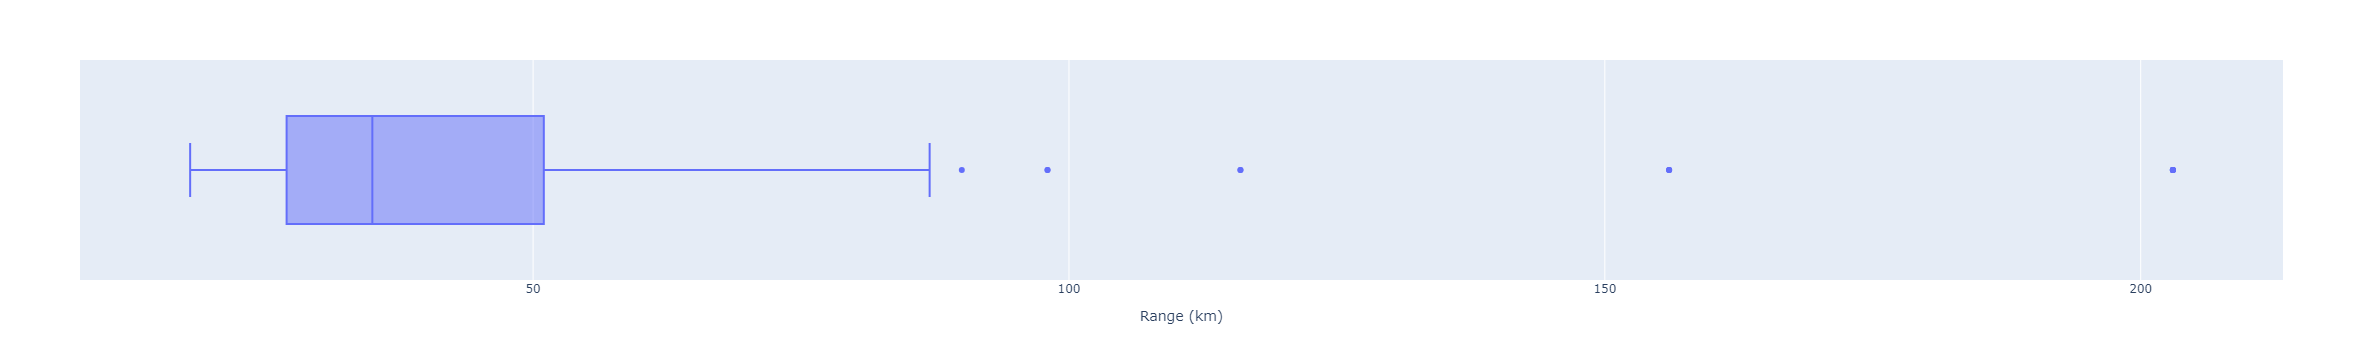

In [64]:
fig = px.box(PHEV_2023, x='Range (km)')

fig.show()

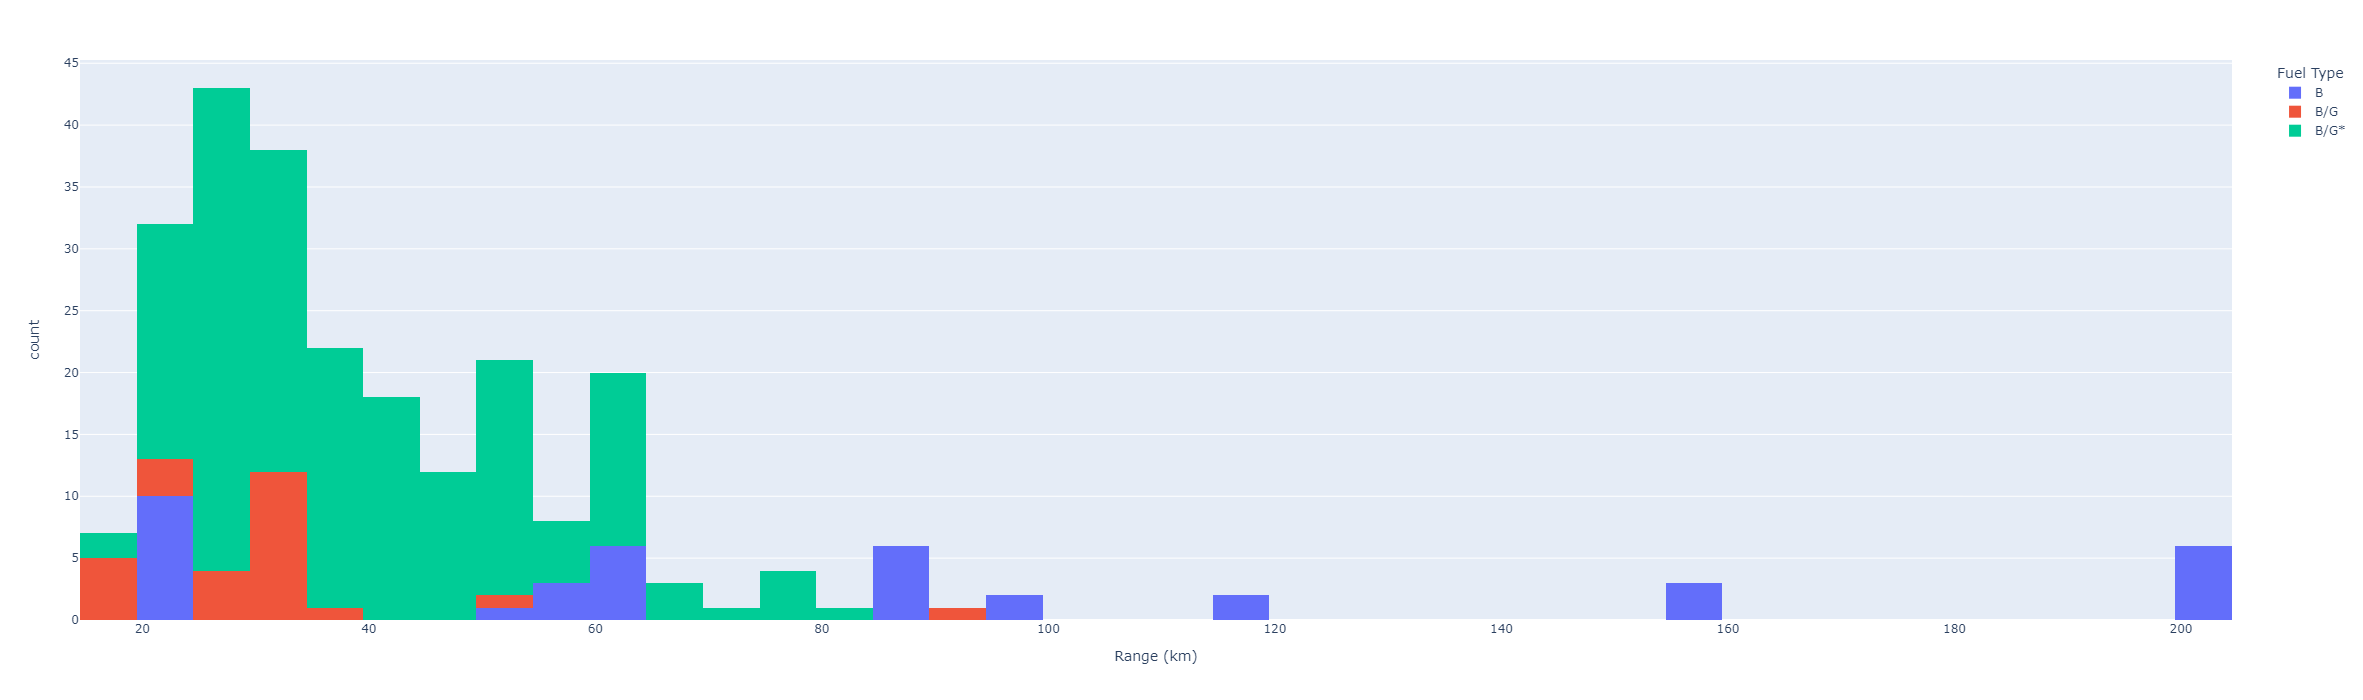

In [65]:
fig = px.histogram(PHEV_2023, x='Range (km)', color='Fuel Type', nbins=40)
fig.update_layout(height=700)

fig.show()

In [66]:
PHEV_2023[PHEV_2023['Range (km)']>80].sort_values('Range (km)')

,Make,Model,Vehicle Class,Motor (kW),Engine Size (L),Cylinders,Fuel Type,Combined Consumption (Le/100km),Range (km),Recharge Time (h),Fuel-only Consumption (L/100km),CO2 Emissions (g/km),Consumption (Le/100km)
164,Polestar,1,Minicompact,170,2.0,4,B/G*,3.9 ([35.4 kWh + 0.0 L]/100 km),84,9.00,9.2,54,3.9
87,Chevrolet,Volt,Compact,111,1.5,4,B,2.2 (19.5 kWh/100 km),85,4.50,5.6,32,2.2
28,Chevrolet,Volt,Compact,111,1.5,4,B,2.2 (19.9 kWh/100 km),85,4.50,5.6,32,2.2
43,Chevrolet,Volt,Compact,111,1.5,4,B,2.2 (19.9 kWh/100 km),85,4.50,5.6,32,2.2
64,Chevrolet,Volt,Compact,111,1.5,4,B,2.2 (19.9 kWh/100 km),85,4.50,5.6,32,2.2
158,Karma,"Revero GT (22"" Wheels)",Subcompact,400,1.5,3,B,3.8 (33.7 kWh/100 km),87,6.25,10.8,60,3.8
156,Karma,"GS-6 (22"" Wheels)",Subcompact,400,1.5,3,B,3.8 (33.7 kWh/100 km),87,6.25,10.8,60,3.8
238,Mercedes-Benz,S 580e 4MATIC Sedan,Full-size,110,3.0,6,B/G,4.6 ([30.4 kWh + 1.2 L]/100 km),90,2.25,10.0,67,4.6
155,Karma,"GS-6 (21"" Wheels)",Subcompact,400,1.5,3,B,3.4 (29.9 kWh/100 km),98,6.25,9.1,44,3.4
157,Karma,"Revero GT (21"" Wheels)",Subcompact,400,1.5,3,B,3.4 (29.9 kWh/100 km),98,6.25,9.1,44,3.4


In [67]:
PHEV_2023['Range Class'] = pd.cut(PHEV_2023['Range (km)'], bins=[0, 35, 210], labels=['<35', '<90'])

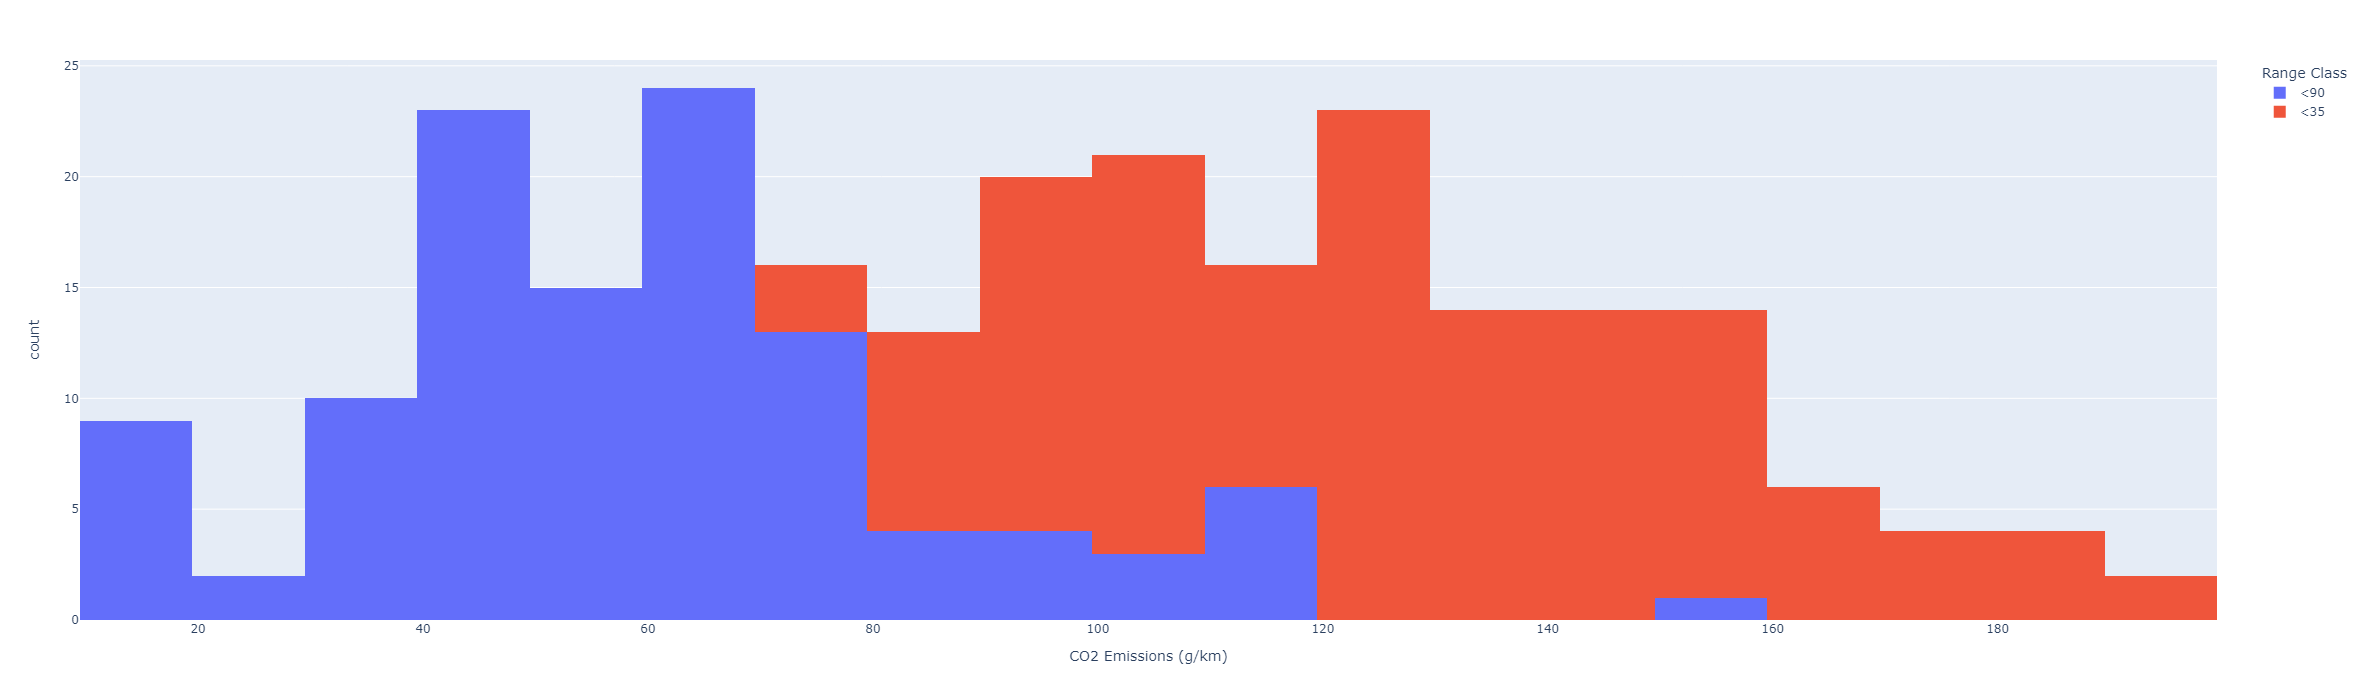

In [68]:
fig = px.histogram(PHEV_2023, x='CO2 Emissions (g/km)', color='Range Class', 
                   # hover_data=['Range (km)'], hover_name='Model'
                  )
fig.update_layout(height=700)

fig.show()

In [69]:
PHEV_2023['Vehicle Class'] = pd.Categorical(PHEV_2023['Vehicle Class'], categories=classes, ordered=True)

In [70]:
PHEV_2023_grouped = PHEV_2023.groupby(['Vehicle Class', 'Range Class']).mean(numeric_only=True)[['Consumption (Le/100km)', 'Fuel-only Consumption (L/100km)', 'CO2 Emissions (g/km)', 'Range (km)']].dropna()

In [71]:
PHEV_2023_grouped

Consumption (Le/100km)  \
Vehicle Class        Range Class                           
Two-seater           <35                        3.400000   
Minicompact          <90                        3.900000   
Subcompact           <35                        3.220000   
                     <90                        2.865000   
Compact              <35                        3.240000   
                     <90                        2.541667   
Mid-size             <35                        3.193548   
                     <90                        2.356250   
Full-size            <35                        4.363636   
                     <90                        4.600000   
Station wagon: Small <35                        3.200000   
                     <90                        2.414286   
SUV: Small           <35                        3.750000   
                     <90                        2.932000   
SUV: Standard        <35                        4.700000   
                     <90                        4.222222   
Minivan              <90                        2.871429   

                                  Fuel-only Consumption (L/100km)  \
Vehicle Class        Range Class                                    
Two-seater           <35                                 9.433333   
Minicompact          <90                                 9.200000   
Subcompact           <35                                 8.460000   
                     <90                                 8.450000   
Compact              <35                                 8.025000   
                     <90                                 6.566667   
Mid-size             <35                                 7.458065   
                     <90                                 5.750000   
Full-size            <35                                10.272727   
                     <90                                10.000000   
Station wagon: Small <35                                 7.800000   
                     <90                                 5.771429   
SUV: Small           <35                                 9.212500   
                     <90                                 7.092000   
SUV: Standard        <35                                10.578571   
                     <90                                10.944444   
Minivan              <90                                 7.800000   

                                  CO2 Emissions (g/km)  Range (km)  
Vehicle Class        Range Class                                    
Two-seater           <35                    136.000000   26.333333  
Minicompact          <90                     54.000000   84.000000  
Subcompact           <35                    121.000000   26.000000  
                     <90                     40.700000  129.050000  
Compact              <35                    108.100000   28.850000  
                     <90                     49.000000   66.916667  
Mid-size             <35                    102.322581   30.064516  
                     <90                     55.031250   50.718750  
Full-size            <35                    148.909091   26.000000  
                     <90                     67.000000   90.000000  
Station wagon: Small <35                     94.000000   35.000000  
                     <90                     54.571429   50.142857  
SUV: Small           <35                    120.250000   29.875000  
                     <90                     65.680000   53.200000  
SUV: Standard        <35                    152.071429   26.142857  
                     <90                    103.666667   50.666667  
Minivan              <90                     71.714286   51.571429

In [72]:
fuel_ratings_2009_grouped.to_clipboard()